In [3]:
from numpy import *
from pylab import imshow, gray, show
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [21]:
M = 101
V = 10
target = 1e-2

phi = zeros([M+1, M+1], float)
phi[0,:] = V
phiprime = empty([M+1, M+1], float)

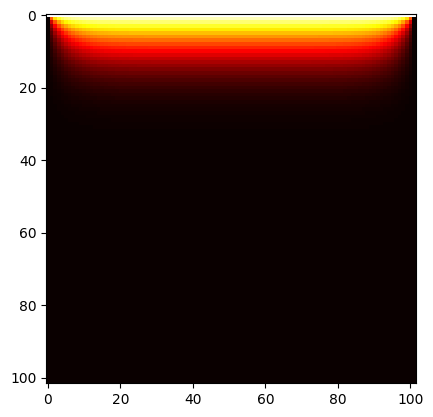

In [23]:
delta = 1.0
while delta > target:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i, j] = phi[i, j]
            else:
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4
    delta = np.max(np.abs(phi-phiprime))
    phi, phiprime = phiprime, phi

imshow(phi)
gray()
# show()
hot()

In [25]:
np.max(abs(phi))

10.0

### Problem 1 - relaxation mathod using Poisson equation

In [76]:
M1 = 100
V1 = 1.0
target1 = 1e-1

p_dens = 1
a, e0 = 1, 1

phi = zeros([M+1, M+1], float)
phiprime = empty([M+1, M+1], float)

phi[0,:], phiprime[0,:] = V1, V1

In [78]:
delta = 1.0

while delta > target1:
    for i in range(M1):
        for j in range(M1):
            if ((i>=20 and i<=40) and (j>=60 and j<=80)):
                phiprime[i,j]= 0.25*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1] + 1)
            elif ((i>=60 and i<=80) and (j>=20 and j<=40)):
                phiprime[i,j]= 0.25*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1] - 1)
            else:
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4
                
    delta = np.max(np.abs(phi - phiprime))
    phi, phiprime = phiprime, phi

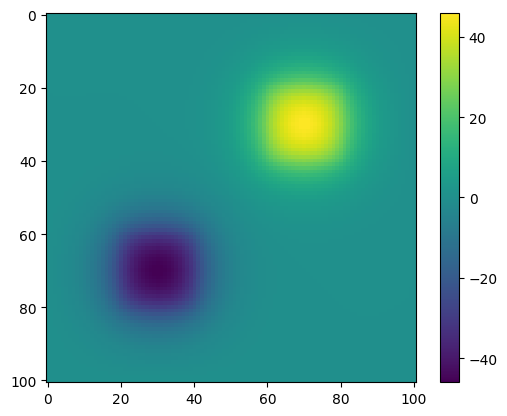

In [82]:
imshow(phi)
colorbar()
viridis()
show()

### Problem 2 - Use the Gauus-Seidel method to solve the Laplace equation

In [86]:
from time import monotonic

M = 71
tol = 1e-2
q = 1.0
e0 = 1.0
L = 1.0
w = 0.9
errmax = 10
err = 10

a = L/M
p = q/(a**2)

phi = zeros([M, M], float)
phi[0, :] = V

t1 = monotonic()

In [88]:
while (abs(errmax > tol)):
    errmax = 0
    for i in range(1, M-1):
        for j in range(1, M-1):
            phiprime = (1/4)*(phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])# + (p*a*a/e0))
            delta = phiprime - phi[i, j]
            phi[i, j] += (1 + w)*delta
                
            err = np.abs(delta)
            if (abs(err) > errmax):
                errmax = err

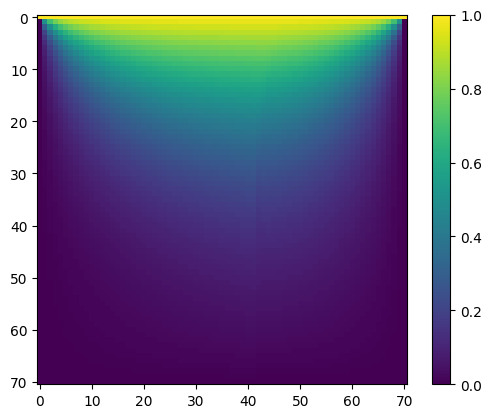

tempo gasto: 3.235 s


In [90]:
t2 = monotonic()
imshow(phi)
plt.colorbar()
viridis()
show()

print(f'tempo gasto: {t2-t1:.3f} s')

### Problem 3 - eletronic capacitors

In [92]:
M = 100
V = 1.0
a, e0 = 1, 1
target = 1e-2

rho = 1

# p_dens = zeros([M+1, M+1], float)
# p_dens[20:80, 20], phi[20:80, 80] = 1, -1

phi = zeros([M+1, M+1], float)
phi[20:80, 20], phi[20:80, 80] = V, -V
phiprime = empty([M+1, M+1], float)

In [94]:
delta = 10

while abs(delta) > target:
    for i in range(M):
        for j in range(M):
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4# + rho*(a)/(4*e0)
                
    delta = np.max(np.abs(phi-phiprime))
    phi, phiprime = phiprime, phi

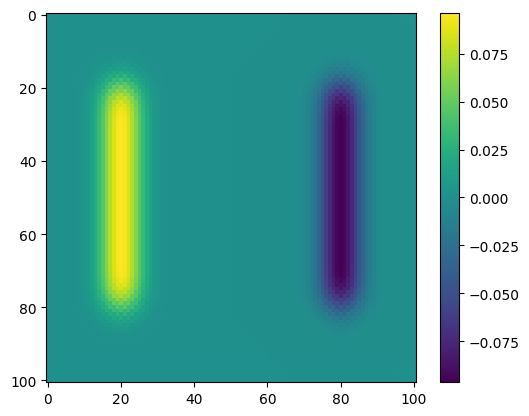

In [96]:
imshow(phi)
colorbar()
viridis()
show()

In [224]:
L = 0.01
D = 4.25e-6
N = 100
a = L/N
h = 1e-4
epsilon = h/1000

Tlo = 0.0
Tmid = 20.0
Thi = 50.0

t1, t2, t3, t4, t5 = 0.01, 0.1, 0.4, 1.0, 10.0
tend = t5 + epsilon

### Problem 4 - thermal diffusion in the earth's crust

In [230]:
def funcT(t):
    return 10 + 12*np.sin(2*pi*t/365)

In [274]:
L = 20.0
D = 0.05
N = 100
a = L/N
h = 0.1
epsilon = h/1000

T = np.ones(N) * 10
T[N-1] = 11.0

t1, t2, t3, t4 = 3375, 3465, 3555, 3650
tend = t4 + epsilon

In [280]:
Tp = np.ones(N) * 10

x = linspace(0, L ,N)

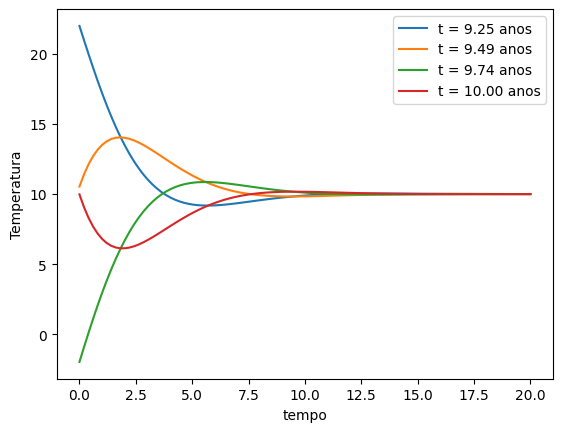

In [282]:
t = 0.0
c = h*D/(a**2)
while t<tend:

    Tp[0] = funcT(t)
    
    for i in range(1, N-1):
        Tp[i] = T[i] + c*(T[i+1] + T[i-1] -2*T[i])
        
    t += h
    T, Tp = Tp, T
    
    if (abs(t-t1)<epsilon) or (abs(t-t2)<epsilon) or (abs(t-t3)<epsilon) or (abs(t-t4)<epsilon):
        ty = t/365
        plot(x, T,label="t = %.2f anos" % ty )

legend()
xlabel('tempo')
ylabel('Temperatura')
show()